# 1. Load dataset
#### In this assignment, you are expected to build a model that finds clusters in the given face images dataset.
#### You will need to read the data from the archive file (faces.zip). It contains 400 images of 40 persons. Each image is 64x64. You can use zipfile for extracting the images, os for iterating the files and PIL for reading the images. Person labels are in the file names. Make sure you preserve the order of images and labels.

In [1]:
!pip install clusterval
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces,make_blobs 
from skimage.io import imshow
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,preprocessing
from sklearn.cluster import KMeans,DBSCAN,MiniBatchKMeans
from sklearn.metrics import silhouette_samples,silhouette_score,classification_report,homogeneity_completeness_v_measure,accuracy_score
from sklearn.pipeline import Pipeline
from clusterval import Clusterval
import warnings
warnings.filterwarnings("ignore")

In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray


imgzip = zipfile.ZipFile("faces.zip")
inflist = imgzip.infolist()
images = []

for f in inflist:
    ifile = imgzip.open(f)
    img = Image.open(ifile)
    numpydata = asarray(img)
    images.append(numpydata)

images = np.array(images)
images = np.reshape(images,(400,4096))
images.shape
df = pd.DataFrame(data=images)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,154,164,162,160,158,168,176,184,191,196,...,172,172,170,172,176,128,203,221,210,197
1,80,99,133,145,150,147,151,161,170,182,...,145,154,162,164,164,168,169,169,170,145
2,159,157,158,164,171,178,185,192,193,198,...,132,128,130,145,154,157,162,164,143,169
3,64,65,106,141,144,146,152,163,173,180,...,138,138,141,148,155,162,164,166,169,169
4,175,172,173,177,178,182,187,192,197,202,...,192,219,133,99,119,118,114,117,115,115


In [3]:
filenamess=[]
for dirname, _, filenames in os.walk('faces'):
    for filename in filenames:
        filenamess.append(filename)
filenames = np.array(filenames).reshape(-1,1)
filenames.shape


(400, 1)

# 2. Prepare dataset
#### Normalize the dataset (for this instance, you can normalize the whole dataset before split). Split the dataset into train (280 instances), validation (80 instances) and test sets (40 instances). When splitting, make sure there are same number of images per person in each set.

In [4]:
from sklearn.model_selection import train_test_split
df = df/255
imgzip = zipfile.ZipFile("faces.zip")
inflist = imgzip.infolist()
images_label = []
for f in inflist:
    images_label.append(int(f.filename.split('_')[0]))
df['label']=np.array(images_label)
X = df.drop("label",axis=1).values
y = df["label"].values

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,shuffle=True)

X_test, X_val,y_test, y_val = train_test_split(X_test,y_test,test_size=2/3, random_state=1,shuffle=True)



# 3. PCA
#### Apply PCA on the data while preserving 99% of the variance.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# 4. Clustering
#### Apply k-means clustering with different k values (e.g., from 5 to 150, with step size of 5). You may want to save the models for later use.

In [40]:
from sklearn.cluster import KMeans
model_list=[]
for i in range(5,150,5):
    Kmean = KMeans(n_clusters=i)
    model=Kmean.fit(X_train_pca)
    model_list+=[model]

# 5. Analysis
#### Draw the elbow plot and silhouette scores plot. You can use silhouette_score from sklearn.

Text(0, 0.5, 'Inertias')

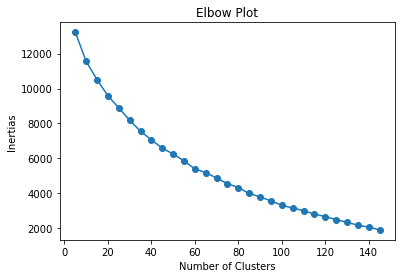

In [43]:
inertias = [model.inertia_ for model in model_list]
plt.plot(range(5, 150, 5), inertias, marker = 'o')
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias")

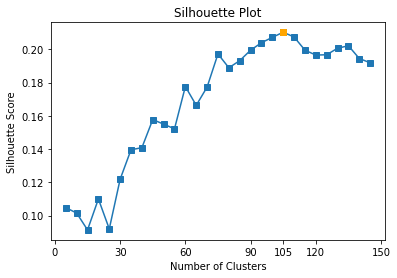

In [47]:
# silhouette
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import silhouette_score

k_values = range(5,150,5)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in model_list]
max_index = np.argmax(silhouette_scores)
max_score = silhouette_scores[max_index]
best_model = model_list[max_index]
k = k_values[max_index]

plt.plot(k_values, silhouette_scores, marker = 's')
plt.plot(k, max_score, marker = 's', color = 'orange')

plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.xticks([0, 30, 60, 90, 120, 150, k])

plt.show()

#### Visualize the clusters (for 40 clusters and best k that you found from silhouette scores) to see whether there are similar faces in each cluster. You can use imshow from matplotlib to visualize images.

Cluster 0


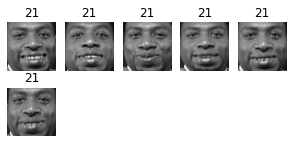

Cluster 1


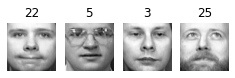

Cluster 2


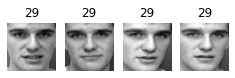

Cluster 3


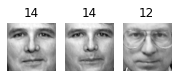

Cluster 4


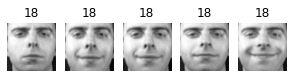

Cluster 5


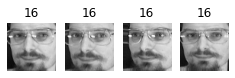

Cluster 6


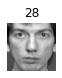

Cluster 7


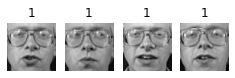

Cluster 8


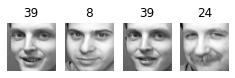

Cluster 9


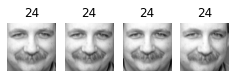

Cluster 10


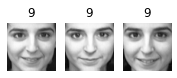

Cluster 11


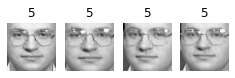

Cluster 12


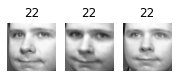

Cluster 13


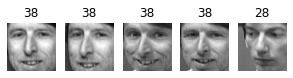

Cluster 14


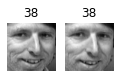

Cluster 15


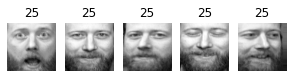

Cluster 16


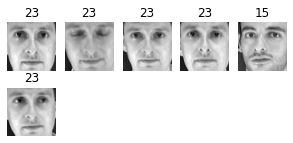

Cluster 17


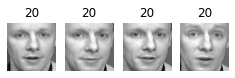

Cluster 18


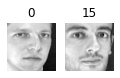

Cluster 19


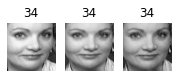

Cluster 20


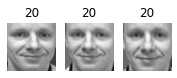

Cluster 21


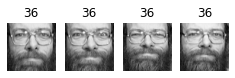

Cluster 22


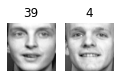

Cluster 23


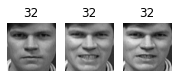

Cluster 24


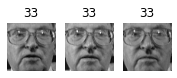

Cluster 25


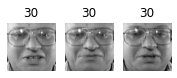

Cluster 26


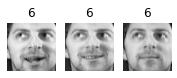

Cluster 27


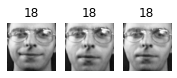

Cluster 28


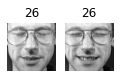

Cluster 29


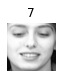

Cluster 30


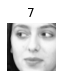

Cluster 31


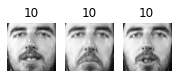

Cluster 32


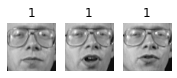

Cluster 33


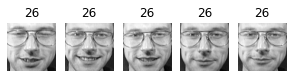

Cluster 34


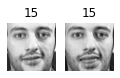

Cluster 35


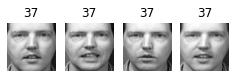

Cluster 36


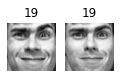

Cluster 37


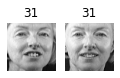

Cluster 38


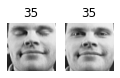

Cluster 39


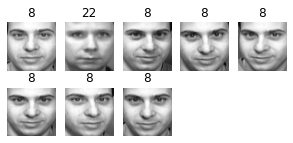

Cluster 40


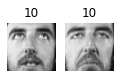

Cluster 41


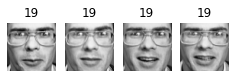

Cluster 42


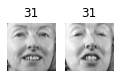

Cluster 43


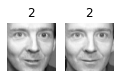

Cluster 44


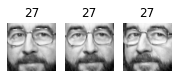

Cluster 45


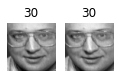

Cluster 46


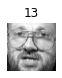

Cluster 47


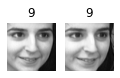

Cluster 48


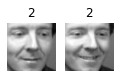

Cluster 49


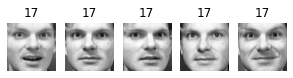

Cluster 50


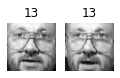

Cluster 51


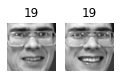

Cluster 52


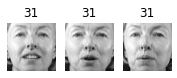

Cluster 53


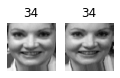

Cluster 54


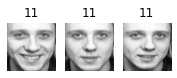

Cluster 55


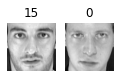

Cluster 56


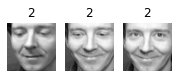

Cluster 57


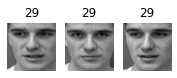

Cluster 58


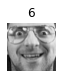

Cluster 59


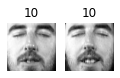

Cluster 60


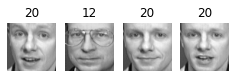

Cluster 61


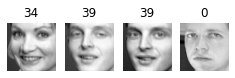

Cluster 62


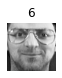

Cluster 63


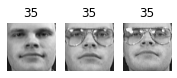

Cluster 64


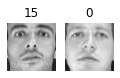

Cluster 65


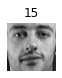

Cluster 66


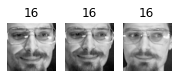

Cluster 67


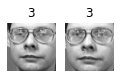

Cluster 68


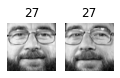

Cluster 69


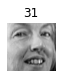

Cluster 70


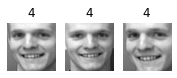

Cluster 71


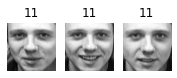

Cluster 72


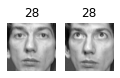

Cluster 73


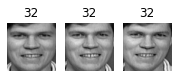

Cluster 74


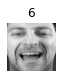

Cluster 75


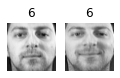

Cluster 76


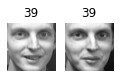

Cluster 77


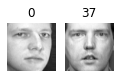

Cluster 78


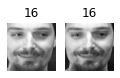

Cluster 79


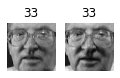

Cluster 80


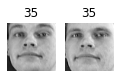

Cluster 81


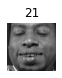

Cluster 82


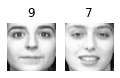

Cluster 83


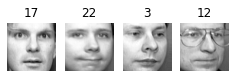

Cluster 84


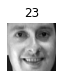

Cluster 85


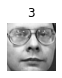

Cluster 86


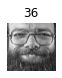

Cluster 87


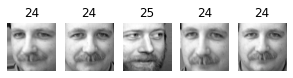

Cluster 88


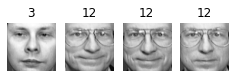

Cluster 89


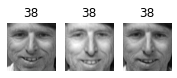

Cluster 90


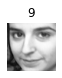

Cluster 91


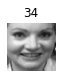

Cluster 92


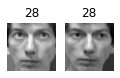

Cluster 93


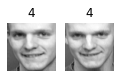

Cluster 94


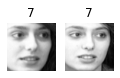

Cluster 95


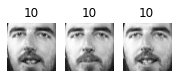

Cluster 96


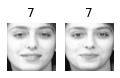

Cluster 97


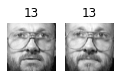

Cluster 98


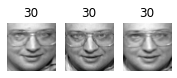

Cluster 99


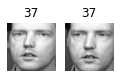

Cluster 100


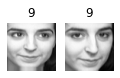

Cluster 101


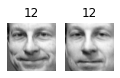

Cluster 102


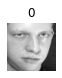

Cluster 103


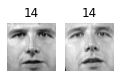

Cluster 104


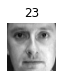

In [56]:
# ?
def plot_faces(faces, labels, n_cols=5):
    faces = np.array(faces).reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

#### Draw the silhouette diagram for 4 values of k: 20, 40, 60, 80. You may want to use the code below from Geron (with certain adjustments):
```python
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()
```

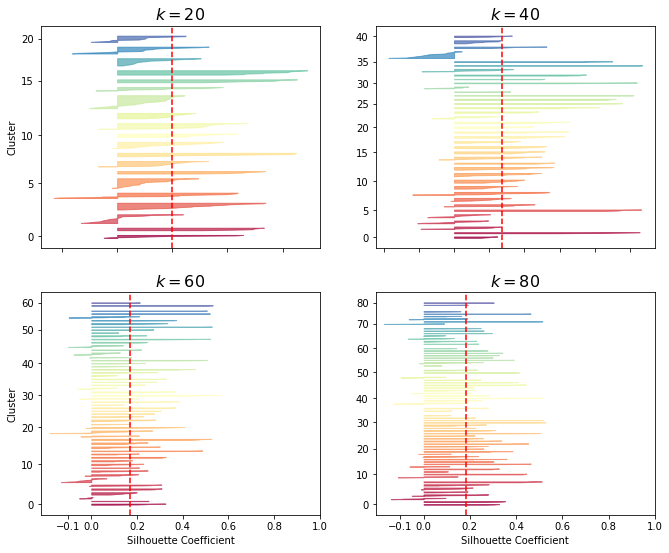

In [20]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (20, 40, 60, 80):
    plt.subplot(2, 2, k // 20)

    y_pred = model_list[k // 5].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    
    if k in (20, 40):
        ticks = ticks[::5] + ticks[-1:]
        k_range = range(0, k + 1, 5)
        
    else:
        ticks = ticks[::10] + ticks[-1:]
        k_range = range(0, k + 1, 10)
        
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(k_range))
    
    
    if k in (20, 60):
        plt.ylabel("Cluster")

    if k in (60, 80):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette[k // 5 - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("silhouette_analysis_plot")
plt.show()

# 6. Classification
#### Train a classifier on the train data to predict person on the image.

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 10, n_estimators = 200, \
                             criterion = 'entropy', random_state = 42)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

In [60]:
rfc.score(X_val_pca, y_val)

0.9875

#### Use best k-means model as a dimensionality reduction technique to reduce the dataset and train a classifier on the reduced data. Your data will have shape (280, number of clusters in the best model). You can use transform method of the k-means model.

In [61]:
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_val_pca)
X_test_reduced = best_model.transform(X_test_pca)

rfc = RandomForestClassifier(n_estimators=150, random_state=42)
rfc.fit(X_train_reduced, y_train)
    
rfc.score(X_val_reduced, y_val)

0.8625

#### Create a pipeline to reduce the data (with k-means) with different numbers of clusters and train a classifier. Find out which value of k gives the best classification result.

In [62]:
from sklearn.pipeline import Pipeline

scores = np.zeros(len(k_values))

for k in k_values:
    pl = Pipeline([
                ('kmeans', KMeans(n_clusters = k, random_state = 42)),
                ('randomforestclassifier', rfc)
        ])
    
    pl.fit(X_train_pca, y_train)
    
    test_score = pl.score(X_val_pca, y_val)
    
    scores[k // 5 - 1] = test_score
    

In [63]:
index = np.argmax(scores, axis = 0)
score = scores[index]
k = (index + 1) * 5 
k, score

(135, 0.875)

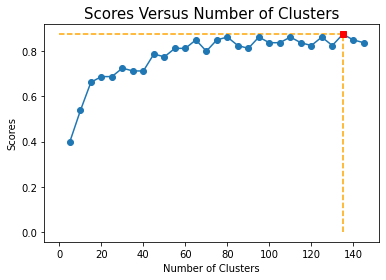

In [64]:
plt.plot([k] * 2, [0, score], color = 'orange', linestyle = '--')
plt.plot([0, k], [score] * 2, color = 'orange', linestyle = '--')

plt.plot(k_values, scores, marker = 'o')
plt.plot(k, score, marker = 's', color = 'red')

plt.title('Scores Versus Number of Clusters', fontsize = '15')
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Scores', fontsize = 10)

plt.show()

#### Add new features to original set of features and check again. Did you get better result than the case without new features?

In [65]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_val_extended = np.c_[X_val_pca, X_val_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [68]:
rfc = RandomForestClassifier(n_estimators=150, random_state=42)
rfc.fit(X_train_extended, y_train)
rfc.score(X_val_extended, y_val)

0.925